<a href="https://colab.research.google.com/github/Romal27/DSGP-24-Retina94/blob/Validating-the-input/RF_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import cv2
from skimage.feature import hog
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Number of F images: 500
Files in F:
DR20.jpg
DR22.jpg
N1.jpg
N2.jpg
DR1.jpg
DR2.jpg
DR3.jpg
DR4.jpg
DR5.jpg
DR6.jpg
DR7.jpg
DR8.jpg
DR9.jpg
DR10.jpg
DR11.jpg
N3.jpg
N4.jpg
N5.jpg
N6.jpg
N13.jpg
N15.jpg
N11.jpg
N19.jpg
N21.jpg
N22.jpg
DR13.jpg
DR14.jpg
DR16.jpg
e55188915f9d.png
e580676516b0.png
e9ff9352ccb3.png
e9286ddf6ffe.png
e96bd80a8a53.png
ead23cc922ed.png
eba3acc42197.png
ea15a290eb96.png
ec4649213ccf.png
ef8109305128.png
eed4afc8ec83.png
eeb231c3ef1f.png
ee78ce914066.png
f0c13be90519.png
f481f76a6b75.png
f5650eb52640.png
f47a2a4a0411.png
f55e1d2a19e4.png
f6f7dba7104d.png
f762c272c522.png
fb6b8200b7f8.png
f72ef9ceeaa8.png
f7fec8935126.png
fea14b3d44b0.png
fecf4c5ae84b.png
fe2df69676cf.png
fd62bd0db4f1.png
fe674c2f73f5.png
fdd18ccbbdc5.png
fca931da5c5e.png
1e143fa3de57.png
1e7ccd4a1c87.png
1da25637859b.png
1d74c4713e21.png
1d3e9b939732.png
1e9224ccca95.png
1cb6961d141c.png
1df0431bfa73.png
1e8c31e29dd3.png
1d14dd912671.png
1da4a17c18c9.png
1d29cb2f4296.png
1cb814ed6332.png
1e742358

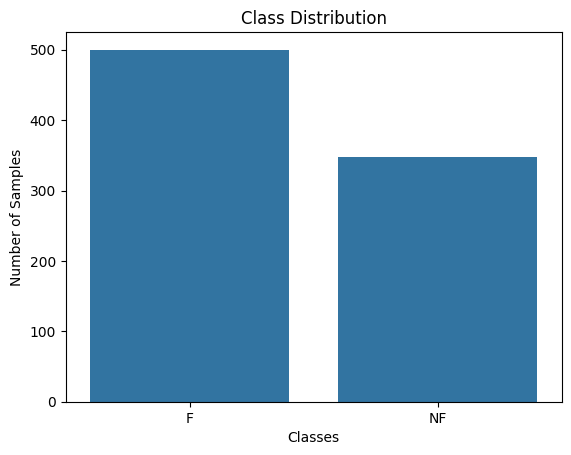

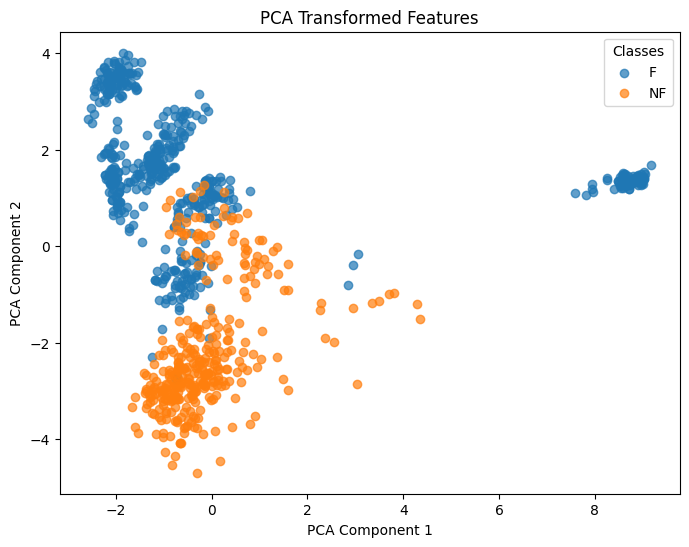

Class Distribution:
F: 500 samples
NF: 347 samples
Random Forest Accuracy: 0.9941176470588236


In [ ]:
image_folder = "/content/drive/My Drive/DSGP/Data"  
labels = []  # Store labels
features = []  # Store extracted features

# Preprocessing and Feature Extraction Function
def preprocess_and_extract(image_path):
    # Read the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Convert to grayscale
    # Resize the image to a fixed size (e.g., 128x128)
    image_resized = cv2.resize(image, (128, 128))
    # Extract HOG features
    hog_features = hog(
        image_resized,
        orientations=9,
        pixels_per_cell=(8, 8),
        cells_per_block=(2, 2),
        block_norm='L2-Hys',
        visualize=False
    )
    return hog_features
# Load Dataset and Extract Features
for category in ['F', 'NF']:
    category_path = os.path.join(image_folder, category)
    # Include files with valid image extensions, even if underscores or special characters are in the names
    image_files = [
        file for file in os.listdir(category_path)
        if file.lower().endswith(('.png', '.jpg', '.jpeg')) and not file.startswith('.')
    ]
    print(f"Number of {category} images: {len(image_files)}")

    # List the files for debugging
    print(f"Files in {category}:")
    for file in image_files:
        print(file)

    # Process each file and extract features
    for file in image_files:
        file_path = os.path.join(category_path, file)
        labels.append(category)  # Use the folder name as the label
        features.append(preprocess_and_extract(file_path))

# After processing, confirm counts
print(f"Total number of 'F' images: {labels.count('F')}")
print(f"Total number of 'NF' images: {labels.count('NF')}")

# Convert to numpy arrays
features = np.array(features)
labels = np.array(labels)

# Save features and labels to a CSV file
features_df = pd.DataFrame(features)
features_df['label'] = labels  # Add labels as a column

# Save to CSV in Google Drive
csv_path = "/content/drive/My Drive/DSGP/extracted_features.csv"
features_df.to_csv(csv_path, index=False)
print(f"Features and labels saved to {csv_path}")

# Visualize class distribution
class_counts = Counter(labels)
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
plt.title("Class Distribution")
plt.xlabel("Classes")
plt.ylabel("Number of Samples")
plt.show()

# Apply PCA for 2D visualization
pca_visual = PCA(n_components=2)
features_pca_visual = pca_visual.fit_transform(features)

# Plot the PCA-transformed features
plt.figure(figsize=(8, 6))
for label in np.unique(labels):
    idx = np.where(labels == label)
    plt.scatter(features_pca_visual[idx, 0], features_pca_visual[idx, 1], label=label, alpha=0.7)

plt.title("PCA Transformed Features")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Classes")
plt.show()

# Print class imbalance
print("Class Distribution:")
for label, count in class_counts.items():
    print(f"{label}: {count} samples")

# Highlight imbalance if significant
if min(class_counts.values()) / max(class_counts.values()) < 0.5:
    print("Warning: Significant class imbalance detected!")

# Dimensionality Reduction with PCA
pca = PCA(n_components=50)  # Adjust the number of components as needed
features_pca = pca.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(features_pca, labels, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", accuracy)
